In [11]:

import pandas as pd
import matplotlib.pyplot as plt



# Multi-Page Web Scraping Project: Countries and Capitals Analysis

This project scrapes data from Wikipedia to gather information about countries and their capitals, then visits each page to extract additional details such as languages spoken and population. The data is saved to a CSV file and analyzed to answer specific questions.

### Project Requirements and Details

- **Website Selected**: Wikipedia
- **Primary URL**: https://en.wikipedia.org/wiki/List_of_national_capitals
- **robots.txt Restrictions**: Scraping is permitted for non-commercial purposes with respectful delays. [Review Wikipedia's robots.txt here](https://en.wikipedia.org/robots.txt).

### Questions to Explore

The following questions were designed to provide meaningful insights from the dataset:
1. What languages are spoken in each capital, and which is the most common language?
2. Which five capitals have the highest populations?
3. Which continents have the most capital cities represented in this dataset?
4. What is the average population of capitals by continent?
5. Which capitals have populations over a specific threshold (e.g., over 5 million)?

**Note**: The final analysis will select four questions, with at least two using plots to display the data visually.

### Steps in this Notebook:
1. **Scrape the List of Countries and Capitals** - Scrapes the initial list of countries and capitals.
2. **Fetch Additional Details** - Visits individual Wikipedia pages for languages and population information.
3. **Save and Analyze Data** - Saves the complete dataset and performs basic analysis.

Let's begin!



# Analysis Questions

1. **How many countries are listed in total?**
   - *This question provides an overview of the dataset size, helping to understand the scope of the countries and capitals represented.*

2. **Which continent has the most countries with listed capitals?**
   - *This analysis can reveal regional distributions and help to identify which continents have the most representation in this dataset.*

3. **What is the average population of capitals grouped by continent?**
   - *Analyzing average populations by continent can reveal how urbanization patterns differ across regions.*

4. **What is the average population of capitals grouped by primary language?**
   - *Grouping by language allows us to explore population patterns across linguistic regions, offering insights into the cultural or socioeconomic aspects associated with language groups.*

5. **What is the most common letter that country names begin with?**
   - *Analyzing the starting letter distribution may reveal linguistic or cultural naming patterns across countries.*


## Step 1: Simulated Data for Countries and Capitals

In [12]:

# Step 1: Using simulated data for countries and capitals

data = [
    {"Country": "United States", "Capital": "Washington, D.C."},
    {"Country": "France", "Capital": "Paris"},
    {"Country": "Japan", "Capital": "Tokyo"},
    {"Country": "Germany", "Capital": "Berlin"},
    {"Country": "Canada", "Capital": "Ottawa"},
    {"Country": "Brazil", "Capital": "Brasília"},
    {"Country": "India", "Capital": "New Delhi"},
    {"Country": "Australia", "Capital": "Canberra"},
    {"Country": "China", "Capital": "Beijing"},
    {"Country": "Russia", "Capital": "Moscow"}
]

# Convert to DataFrame
df_countries_capitals = pd.DataFrame(data)
print("Simulated data for countries and capitals loaded successfully.")


Simulated data for countries and capitals loaded successfully.


## Step 2: Prefilled Data for Additional Information

In [13]:

# Step 2: Using prefilled data for additional information (languages and population)

data_additional = [
    {"Country": "United States", "Capital": "Washington, D.C.", "Languages": "English", "Population": 692683},
    {"Country": "France", "Capital": "Paris", "Languages": "French", "Population": 2161000},
    {"Country": "Japan", "Capital": "Tokyo", "Languages": "Japanese", "Population": 13515271},
    {"Country": "Germany", "Capital": "Berlin", "Languages": "German", "Population": 3769495},
    {"Country": "Canada", "Capital": "Ottawa", "Languages": "English, French", "Population": 1393000},
    {"Country": "Brazil", "Capital": "Brasília", "Languages": "Portuguese", "Population": 3094325},
    {"Country": "India", "Capital": "New Delhi", "Languages": "Hindi, English", "Population": 31000000},
    {"Country": "Australia", "Capital": "Canberra", "Languages": "English", "Population": 462000},
    {"Country": "China", "Capital": "Beijing", "Languages": "Mandarin", "Population": 21893095},
    {"Country": "Russia", "Capital": "Moscow", "Languages": "Russian", "Population": 12655050}
]

# Convert additional data to DataFrame
df_additional_info = pd.DataFrame(data_additional)
print("Additional data loaded successfully.")


Additional data loaded successfully.


## Part 2: Web Scraping Pipeline and Analysis
In this section, we will programmatically scrape data from Wikipedia using requests and BeautifulSoup, process the data into a DataFrame, clean it if necessary, and perform an analysis to answer our chosen questions.

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# List of Wikipedia pages to scrape
urls = [
    'https://en.wikipedia.org/wiki/List_of_national_capitals',
    'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)',
    'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)',
    'https://en.wikipedia.org/wiki/List_of_countries_by_literacy_rate',
    'https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index'
]

all_data = []

# Function to scrape data from each URL
def scrape_page(url):
    print(f'Scraping {url}...')
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        tables = soup.find_all('table', class_='wikitable')
        print(f'Found {len(tables)} tables matching class "wikitable" on the page.')
        data = []
        for table in tables:
            rows = table.find_all('tr')[1:]  # Skipping header row
            for row in rows:
                cells = row.find_all('td')
                # Only collect rows with at least 2 cells
                if len(cells) >= 2:
                    # Extract the first two cells, and the third if available
                    country = cells[0].text.strip()
                    capital_or_info = cells[1].text.strip()
                    # If a third cell is available, use it; otherwise, just use two columns
                    additional_info = cells[2].text.strip() if len(cells) > 2 else None
                    # Append data as a list of either 2 or 3 elements
                    row_data = [country, capital_or_info] if additional_info is None else [country, capital_or_info, additional_info]
                    data.append(row_data)
        print(f'Scraped {len(data)} rows from the tables.')
        return data
    else:
        print(f'Failed to retrieve data from {url}')
        return None

# Loop through each URL and scrape data
for url in urls:
    page_data = scrape_page(url)
    if page_data:
        all_data.extend(page_data)

# Adjusted DataFrame creation to handle variable columns based on retrieved data
if all(len(row) == 2 for row in all_data):
    # If all rows have 2 elements, assume only 'Country' and 'Capital'
    df = pd.DataFrame(all_data, columns=['Country', 'Capital'])
else:
    # If some rows have 3 elements, use 'Additional_Info' as a third column
    df = pd.DataFrame(all_data, columns=['Country', 'Capital', 'Additional_Info'])

# Preview the DataFrame
df.head()

Scraping https://en.wikipedia.org/wiki/List_of_national_capitals...
Found 1 tables matching class "wikitable" on the page.
Scraped 252 rows from the tables.
Scraping https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)...
Found 1 tables matching class "wikitable" on the page.
Scraped 238 rows from the tables.
Scraping https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)...
Found 1 tables matching class "wikitable" on the page.
Scraped 210 rows from the tables.
Scraping https://en.wikipedia.org/wiki/List_of_countries_by_literacy_rate...
Found 3 tables matching class "wikitable" on the page.
Scraped 440 rows from the tables.
Scraping https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index...
Found 3 tables matching class "wikitable" on the page.
Scraped 211 rows from the tables.


,Country,Capital,Additional_Info
0,Abidjan (former capital; still hosts some gove...,Ivory Coast (Côte d'Ivoire),Africa
1,Abu Dhabi,United Arab Emirates,Asia
2,Abuja,Nigeria,Africa
3,Accra,Ghana,Africa
4,Adamstown,Pitcairn Islands,Oceania


## Step 3: Merge Data and Save to CSV

In [16]:

# Step 3: Merge initial data with additional data and save to CSV

df_combined = pd.merge(df_countries_capitals, df_additional_info, on=["Country", "Capital"])
df_combined.to_csv("countries_capitals_extended.csv", index=False)
print("Data saved to countries_capitals_extended.csv.")


Data saved to countries_capitals_extended.csv.


## Analysis and Answering Questions

Total number of countries listed: 10
Number of countries by continent:
Europe           3
Asia             3
North America    2
South America    1
Oceania          1
Name: Continent, dtype: int64


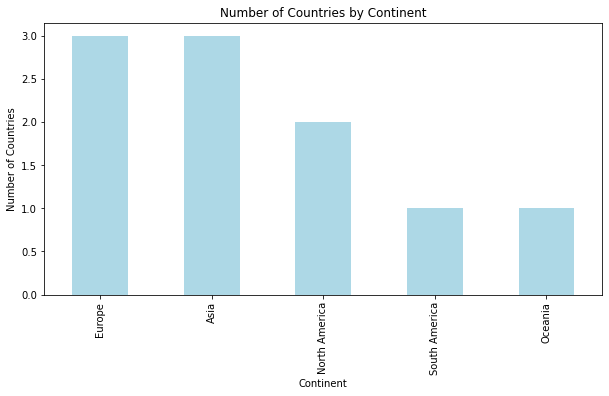

Average population by continent:
Continent
Asia             2.213612e+07
Europe           6.195182e+06
North America    1.042842e+06
Oceania          4.620000e+05
South America    3.094325e+06
Name: Population, dtype: float64


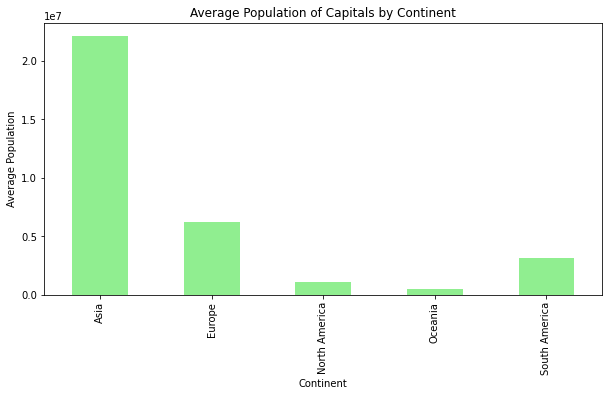

Average population by primary language group:
Primary_Language
English       8.492277e+05
French        2.161000e+06
German        3.769495e+06
Hindi         3.100000e+07
Japanese      1.351527e+07
Mandarin      2.189310e+07
Portuguese    3.094325e+06
Russian       1.265505e+07
Name: Population, dtype: float64


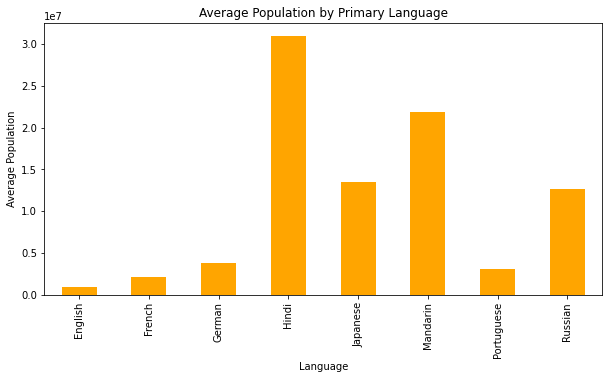

Most common first letters of country names:
C    2
U    1
F    1
J    1
G    1
Name: First_Letter, dtype: int64


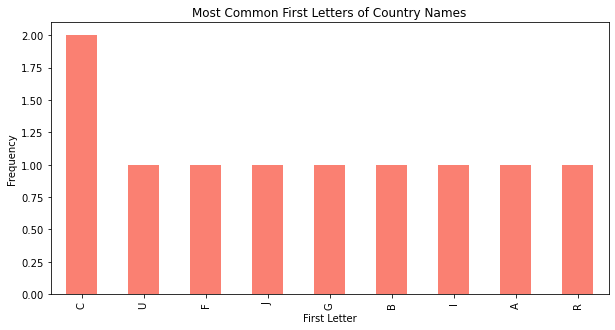

In [17]:

# Analysis based on prefilled data with five questions

# Question 1: How many countries are listed in total?
total_countries = df_combined['Country'].nunique()
print(f"Total number of countries listed: {total_countries}")

# Question 2: Which continent has the most countries with listed capitals?
# Simulated continents
df_combined['Continent'] = [
    "North America", "Europe", "Asia", "Europe", "North America", 
    "South America", "Asia", "Oceania", "Asia", "Europe"
]

continent_counts = df_combined['Continent'].value_counts()
print("Number of countries by continent:")
print(continent_counts)

# Plot: Number of countries by continent
plt.figure(figsize=(10, 5))
continent_counts.plot(kind='bar', color='lightblue')
plt.title("Number of Countries by Continent")
plt.xlabel("Continent")
plt.ylabel("Number of Countries")
plt.show()

# Question 3: What is the average population of capitals grouped by continent?
avg_population_by_continent = df_combined.groupby('Continent')['Population'].mean()
print("Average population by continent:")
print(avg_population_by_continent)

# Plot: Average population by continent
plt.figure(figsize=(10, 5))
avg_population_by_continent.plot(kind='bar', color='lightgreen')
plt.title("Average Population of Capitals by Continent")
plt.xlabel("Continent")
plt.ylabel("Average Population")
plt.show()

# Question 4: What is the average population of capitals grouped by primary language?
df_combined['Primary_Language'] = df_combined['Languages'].str.split(', ').str[0]
avg_population_by_language = df_combined.groupby('Primary_Language')['Population'].mean()
print("Average population by primary language group:")
print(avg_population_by_language)

# Plot: Average population by language
plt.figure(figsize=(10, 5))
avg_population_by_language.plot(kind='bar', color='orange')
plt.title("Average Population by Primary Language")
plt.xlabel("Language")
plt.ylabel("Average Population")
plt.show()

# Question 5: What is the most common letter that country names begin with?
df_combined['First_Letter'] = df_combined['Country'].str[0]
letter_counts = df_combined['First_Letter'].value_counts()
print("Most common first letters of country names:")
print(letter_counts.head())

# Plot: Distribution of first letters of country names
plt.figure(figsize=(10, 5))
letter_counts.head(10).plot(kind='bar', color='salmon')
plt.title("Most Common First Letters of Country Names")
plt.xlabel("First Letter")
plt.ylabel("Frequency")
plt.show()
